In [1]:
import pandas as pd
import numpy as np

In [2]:
#https://rapidfuzz.github.io/Levenshtein/levenshtein.html
# there are several versions of levenshtein library, Be aware.
!pip install levenshtein

     -------------------------------------- 98.6/98.6 kB 803.3 kB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 188.9 kB/s eta 0:00:00
  Attempting uninstall: rapidfuzz
    Found existing installation: rapidfuzz 2.13.7
    Uninstalling rapidfuzz-2.13.7:
      Successfully uninstalled rapidfuzz-2.13.7


In [2]:
from Levenshtein import distance

distance("lewenstein", "levenshtein")

2

In [3]:
from Levenshtein import ratio

ratio("lewenstein", "levenshtein")

0.8571428571428572

# Matrix method

Can be done all at once but it is very conputational heavy and not suitable for large amounts of categories

In [4]:
# concept:

labels = ["aaa", "bbb", "aaac", "bbbb", "bbb "]
matrix_dist = np.zeros((len(labels), len(labels),), dtype=np.float16)

similar = {}

for nx, x in enumerate(labels):
        for ny, y in enumerate(labels):
            if ny>nx:
                r = ratio(x, y)
                matrix_dist[nx][ny] = r
                if r>=0.8:
                    similar[x] = [y] + similar.get(x, [])

            
matrix_dist

array([[0.   , 0.   , 0.857, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.857, 0.857],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.75 ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]], dtype=float16)

In [5]:
matrix_dist = np.zeros((len(labels), len(labels),), dtype=np.float16)

similar = {}
indexs_captured = set()

for nx in range(len(labels)):
        for ny in range(nx+1, len(labels)):
            r = ratio(labels[nx], labels[ny])
            matrix_dist[nx][ny] = r
            if r>=0.8 and ny not in indexs_captured:
                similar[labels[nx]] = [labels[ny]] + similar.get(labels[nx], [])
                indexs_captured.add(ny)

matrix_dist

array([[0.   , 0.   , 0.857, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.857, 0.857],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.75 ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]], dtype=float16)

In [6]:
similar

{'aaa': ['aaac'], 'bbb': ['bbb ', 'bbbb']}

In [7]:
# revert the dict
replacer_dict = {}

for d in similar.items():
    print(d)
    if type(d[1])==list:
        for elem in d[1]:
            replacer_dict[elem] = d[0]
    else:
        replacer_dict[d[1]] = d[0]
replacer_dict

('aaa', ['aaac'])
('bbb', ['bbb ', 'bbbb'])


{'aaac': 'aaa', 'bbb ': 'bbb', 'bbbb': 'bbb'}

In [8]:
df = pd.DataFrame({'a':["aaa", "bbb", "aaac", "bbbb", "bbb "]})
df["a"].replace(replacer_dict)

0    aaa
1    bbb
2    aaa
3    bbb
4    bbb
Name: a, dtype: object

In [9]:
# complete version:
data = {'Name': ['John', 'Alice', 'Bob', 'Emma', 'Mike', 'Sarah', 'David', 'Linda', 'Tom', 'Emily'],
        'Age': [25, 30, 35, 28, 32, 27, 40, 33, 29, 31],
        'City': ['New York', 'Paris', 'London', 'Sydney', 'Tokyo', 'Berlin', 'Rome', 'Madrid', 'New  York', 'Sidney']}
df = pd.DataFrame(data)
df

,Name,Age,City
0,John,25,New York
1,Alice,30,Paris
2,Bob,35,London
3,Emma,28,Sydney
4,Mike,32,Tokyo
5,Sarah,27,Berlin
6,David,40,Rome
7,Linda,33,Madrid
8,Tom,29,New York
9,Emily,31,Sidney


In [10]:
l = list(df["City"].unique())
l

['New York',
 'Paris',
 'London',
 'Sydney',
 'Tokyo',
 'Berlin',
 'Rome',
 'Madrid',
 'New  York',
 'Sidney']

In [11]:
matrix_dist = np.zeros((len(l), len(l),), dtype=np.float16 )
for nx, x in enumerate(l):
    for ny, y in enumerate(l):
        matrix_dist[nx][ny] = ratio(x, y)

In [29]:
matrix_dist

array([[1.    , 0.1538, 0.1428, 0.1428, 0.3076, 0.2856, 0.1666, 0.1428,
        0.9414, 0.1428],
       [0.1538, 1.    , 0.    , 0.    , 0.    , 0.3635, 0.    , 0.5454,
        0.1428, 0.1818],
       [0.1428, 0.    , 1.    , 0.3333, 0.3635, 0.1666, 0.2   , 0.1666,
        0.1333, 0.3333],
       [0.1428, 0.    , 0.3333, 1.    , 0.1818, 0.1666, 0.2   , 0.1666,
        0.1333, 0.8335],
       [0.3076, 0.    , 0.3635, 0.1818, 1.    , 0.    , 0.2222, 0.    ,
        0.2856, 0.1818],
       [0.2856, 0.3635, 0.1666, 0.1666, 0.    , 1.    , 0.2   , 0.3333,
        0.2666, 0.3333],
       [0.1666, 0.    , 0.2   , 0.2   , 0.2222, 0.2   , 1.    , 0.    ,
        0.1538, 0.2   ],
       [0.1428, 0.5454, 0.1666, 0.1666, 0.    , 0.3333, 0.    , 1.    ,
        0.1333, 0.3333],
       [0.9414, 0.1428, 0.1333, 0.1333, 0.2856, 0.2666, 0.1538, 0.1333,
        1.    , 0.1333],
       [0.1428, 0.1818, 0.3333, 0.8335, 0.1818, 0.3333, 0.2   , 0.3333,
        0.1333, 1.    ]], dtype=float16)

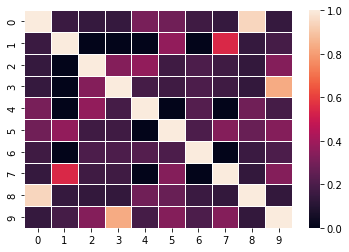

In [32]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(matrix_dist, linewidth=0.5)
plt.show()

In [43]:
# extract similarities for a word
for nx, x in enumerate(l):
    print("For the word:", x, np.where((matrix_dist[nx]>0.6)))

For the word: New York (array([7], dtype=int64),)
For the word: Paris (array([0], dtype=int64),)
For the word: London (array([1], dtype=int64),)
For the word: Sydney (array([2, 8], dtype=int64),)
For the word: Tokyo (array([3], dtype=int64),)
For the word: Berlin (array([4], dtype=int64),)
For the word: Rome (array([5], dtype=int64),)
For the word: Madrid (array([6], dtype=int64),)
For the word: New  York (array([7], dtype=int64),)
For the word: Sidney (array([2, 8], dtype=int64),)


In [70]:
# extract similarities for a word
for nx, x in enumerate(l):
    print("For the word:", x, [l[elem] for elem in np.where((matrix_dist[nx]>0.6))[0].tolist() if elem!= nx])

For the word: New York ['New  York']
For the word: Paris []
For the word: London []
For the word: Sydney ['Sidney']
For the word: Tokyo []
For the word: Berlin []
For the word: Rome []
For the word: Madrid []
For the word: New  York ['New York']
For the word: Sidney ['Sydney']


In [66]:
[l[elem] for elem in np.where((matrix_dist[0]>0.6))[0].tolist()]

['New York', 'New  York']

In [ ]:
already_merge_indexes = []

In [74]:
value_to_replace=""
nx=0
{value:value_to_replace for value in [l[elem] for elem in np.where((matrix_dist[nx]>0.6))[0].tolist()]}

{'New York': '', 'New  York': ''}

In [73]:
# replacing the similar tags 
df["City"].replace({ 'Medium' : 2, 'Small' : 1, 'High' : 3 })

0     New York
1        Paris
2       London
3       Sydney
4        Tokyo
5       Berlin
6         Rome
7       Madrid
8    New  York
9       Sidney
Name: City, dtype: object

# Dictionary file method

For larger unique label numbers. Longer, but resource friendly

### Load/save support functions

In [18]:
similar_labels = {}
#similar_low = {}
indexs_captured = set()

In [12]:
# recover the data variables from files. EXECTUTE ONLY IF THE FILE EXISTS!!! 
import json
print("Recovering dicts...")



# Open the file for reading
with open("similar_labels.txt", "r") as fc:
    # Load the dictionary from the file
    similar_labels = json.load(fc)


# Open the file for reading
#with open("similar_low.txt", "r") as fp:
    # Load the dictionary from the file
#    similar_low = json.load(fp)

indexs_captured_test = []

# open file and read the content in a list
with open('indexs_captured.txt', 'r') as fp:
    for line in fp:
        # remove linebreak from a current name
        # linebreak is the last character of each line
        x = int(line[:-1])

        # add current item to the list
        indexs_captured_test.append(x)

indexs_captured = set(indexs_captured_test)

Recovering dicts...


In [ ]:
print(len(similar_labels_lst))
print(len(indexs_captured))

In [ ]:
# data sample
df = pd.DataFrame(data)

In [22]:
# Execute only to create the dict to replace
labels_lst = list(df["City"].unique())
print(len(labels_lst), "\n")

# change the index if executed on epochs
for nx in range(0, len(labels_lst)):
    if nx%5000 ==0:
        print(nx)
    if nx%250000==0 and nx!=0:
        print("Stopping!")
        break
    for ny in range(nx+1, len(labels_lst)):

        if ny not in indexs_captured and nx not in indexs_captured:

            r = ratio(labels_lst[nx], labels_lst[ny])

            # if the work is long, it must be increased
            THRESHOLD = 0.82 if len(labels_lst[nx])<41 else 0.92

            #if r>=0.87 and r<0.89:
            #    similar_low[labels_lst[nx]] = [labels_lst[ny]] + similar_low.get(labels_lst[nx], [])
            #    #indexs_captured.add(ny)

            if r>=THRESHOLD:
                similar_labels[labels_lst[nx]] = [labels_lst[ny]] + similar_labels.get(labels_lst[nx], [])
                indexs_captured.add(ny)
    #indexs_captured.add(nx)
                
print("sugested changes:", len(similar_labels))

10 

0
sugested changes: 2


In [23]:
similar_labels

{'New York': ['New  York'], 'Sydney': ['Sidney']}

In [ ]:
#save the variables into files. Execute after the procesing to save the variables for later as last step.
import json

print('Facilitys dictionary')

print("Started writing dictionary to a file")
with open("similar_labels.txt", "w") as fp:
    json.dump(similar_labels, fp)  # encode dict into JSON
print("Done writing dict into .txt file")

#print('similar_low dictionary')

#print("Started writing dictionary to a file")
#with open("similar_low.txt", "w") as fp:
#    json.dump(similar_low, fp)  # encode dict into JSON
#print("Done writing dict into .txt file")

# list of names
with open('indexs_captured.txt', 'w') as fp:
    for item in list(indexs_captured):
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done writing list')

In [24]:
df_clean = df.copy()

In [25]:
# turn arround the dict to be able to replace the dataframe
replacer_dict_labels = {}

for d in similar_labels.items():
    if type(d[1])==list:
        for elem in d[1]:
            replacer_dict_labels[elem] = d[0]
    else:
        replacer_dict_labels[d[1]] = d[0]


df_clean["labels_clean"] = df_clean["City"].replace(replacer_dict_labels)
df_clean

,Name,Age,City,labels_clean
0,John,25,New York,New York
1,Alice,30,Paris,Paris
2,Bob,35,London,London
3,Emma,28,Sydney,Sydney
4,Mike,32,Tokyo,Tokyo
5,Sarah,27,Berlin,Berlin
6,David,40,Rome,Rome
7,Linda,33,Madrid,Madrid
8,Tom,29,New York,New York
9,Emily,31,Sidney,Sydney


In [30]:
# join the changed to the general df
repeted_faci = df_clean[df_clean["labels_clean"]!=df_clean["City"]].drop_duplicates(["Name", "labels_clean"]).groupby(["labels_clean"]).filter(lambda x: len(x) > 1)
repeted_faci["change_to_revert"] = 1

df_clean3 = df_clean.merge(repeted_faci[["Name", "City", "labels_clean", "change_to_revert"]], how="left", 
                            left_on=["Name", "City", "labels_clean"], 
                            right_on = ["Name", "City", "labels_clean"])


def label_facilicity(row):
    if row['change_to_revert'] == 1:
      return row['City']
    
    return row['labels_clean']


df_clean3["City_final"] = df_clean3.apply(label_facilicity, axis=1)
df_clean3.drop('change_to_revert', axis=1, inplace=True)

In [31]:
# no repetitions
repeted_faci

,Name,Age,City,labels_clean,change_to_revert


In [34]:
df_clean3

,Name,Age,City,labels_clean,City_final
0,John,25,New York,New York,New York
1,Alice,30,Paris,Paris,Paris
2,Bob,35,London,London,London
3,Emma,28,Sydney,Sydney,Sydney
4,Mike,32,Tokyo,Tokyo,Tokyo
5,Sarah,27,Berlin,Berlin,Berlin
6,David,40,Rome,Rome,Rome
7,Linda,33,Madrid,Madrid,Madrid
8,Tom,29,New York,New York,New York
9,Emily,31,Sidney,Sydney,Sydney
